In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import umap as um
import numpy as np
from sklearn.cluster import KMeans
from pyballmapper import BallMapper
import kmapper as km
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm


%matplotlib widget

iris = load_iris() 
headers_iris = iris['target_names']
X_iris = iris['data']

INFO: Using numpy backend


# 1) Choice of a clustering algorithm

To create our tool named ClusterGraph, we need to get clusters from a clustering algorithm.

### Ball Mapper

In [2]:
# creation of BALL MAPPER
bm_iris = BallMapper(points = X_iris, epsilon = 0.8)

# Get clusters from Ball mapper
clusters_iris = cg.get_clusters_from_BM(bm_iris)

### KMeans

In [3]:
model_KM = KMeans(15)
prediction_KM =model_KM.fit_predict(X_iris)

# Get the clusters from the predictions
clusters_iris = cg.get_clusters_from_scikit(prediction_KM)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


# 2) Creation ClusterGraph

Once we got the clusters, we use them and the dataset to create the object ClusterGraph.

There is also different possibilities to change the metrics used. The default one are the euclidean distance between point and the average distances between two clusters.

After creating the object we launch 'distances_clusters' which is the function that will compute all the distances and create the abstract graph that will represent our dataset.

In this graph, each node represents a cluster and each edge represents the distance between two clusters.

In [4]:
# Creation of the object
cluster_g = cg.Cluster_graph(X = X_iris, clusters = clusters_iris)

# Compute the distances between all the clusters
cluster_g.distances_clusters()

Central Vertice 6
Farthest away Vertice 11
Vertices and size {1: 12, 2: 23, 3: 7, 4: 17, 5: 4, 6: 11, 7: 9, 8: 13, 9: 8, 10: 3, 11: 19, 12: 10, 13: 11, 14: 2, 15: 1}


# 3) Visualization of the ClusterGraph

### Distance graph with slider

This graph lets us observe the evolution of the ClusterGraph by adding the edges from shortest to longest one by moving the slider bar.

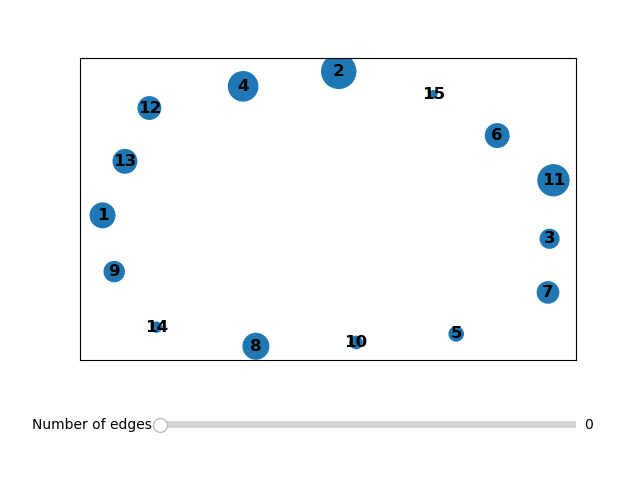

In [5]:
keep =cp.draw_distances_graph(cluster_g.graph)

### Erase edges the less useful

Here the goal is to filtered a bit the edges because with too many edges it is difficult to observe the distances between components and clusters.

We will delete some edges by choosing the precision. Higher is the precision and less edges will be added.

The precision is the amount of information we accept to loose to get a graph easier to observe. 

Precision = 2 means that we won't add an edge if  :
|current existing path - edge| <= precision x edge

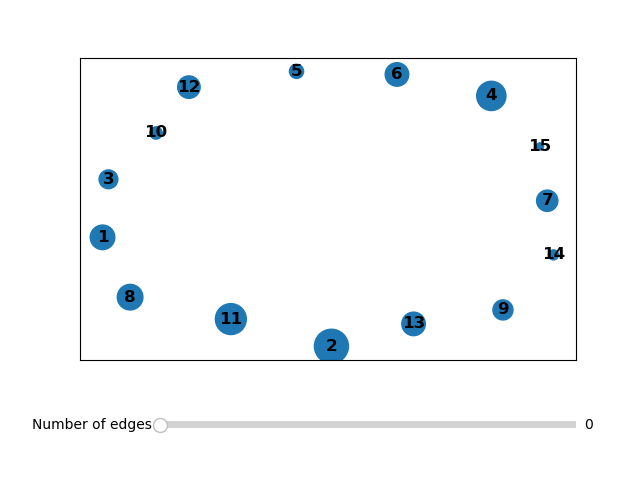

In [6]:
precision  = 1
graph_filtered =  cg.filtration(cluster_g.graph, cluster_g.edges, label = 'label',
                                precision = precision) 
   
keep =cp.draw_distances_graph(graph_filtered)           

## Point cloud from UMAP

Text(0.5, 0, '15 neighbors')

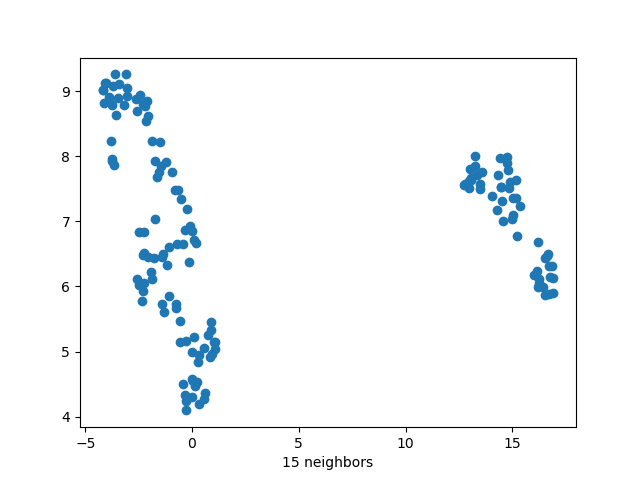

In [7]:
import umap as um
uma = um.UMAP(n_neighbors = 15)
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_iris)
X_umap = uma.fit_transform(X_stand)
plt.close('all')
plt.scatter(X_umap[:,0], X_umap[:,1])
plt.xlabel('15 neighbors')

## Compare ClusterGraph and point cloud

### Compare by percentage of points covered

By selecting the clusters on the left, it will color the clusters or points or the right which possessed also some of the points covered by the selected cluster(s).

The color on the right will be stronger depending on the percentage of points covered on the cluster on the right by the selected one(s) on the left.

In [8]:
title_left = "Iris ClusterGraph"
title_right ="Iris UMAP"

info_1 = cluster_g.graph
number_edges_wanted = 30
color = 'darkcyan'

cp.compare_graph_cloud(info_1, X_umap, nb_edges = number_edges_wanted, title_left = title_left, title_right = title_right, 
                        choice_col_type = 'points_covered', X_col = None, name_var_col = None,
                        labels_col = None, labels_2 = None, color_non_selected_nodes =color  )

### Compare with the targetted values

Here , we can give a list of labels (associating each point with one label) which is the number of the instances in the dataset length.

It will create one list of labels.

When the slider is on -1, the label the most represented in each nodes in giving its color.

Above -1, only the cluster with some points belonging to the chosen label will be colored. Slider = 0 represents the first label encountered in the list of labels given.

In [9]:
title_left = "Iris ClusterGraph"
title_right ="Iris UMAP"

X_target = iris['target']


info_1 = cluster_g.graph
number_edges_wanted = 30
color = 'white'
cp.compare_graph_cloud(info_1, X_umap, nb_edges = number_edges_wanted, title_left = title_left, title_right = title_right, 
                        choice_col_type = 'labels', X_col = None, name_var_col = None,
                        labels_col = X_target, labels_2 = None, color_non_selected_nodes =color, palette = cm.get_cmap(name='viridis') )

TYPE <class 'int'>


# Show only ClusterGraph(s)

### Creation second ClusterGraph

In [10]:
mapper = km.KeplerMapper(verbose=0)
# Fit to and transform the data 
projected_data = mapper.fit_transform(X_iris)

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph_mapper = mapper.map(projected_data, X_iris, cover=cover, clusterer = KMeans(2))

# Get the clusters from the mapper
clusters_iris_2 = cg.get_clusters_from_Mapper(graph_mapper)


cluster_g_M = cg.Cluster_graph(X = X_iris, clusters = clusters_iris_2)
cluster_g_M.distances_clusters()

Central Vertice 12
Farthest away Vertice 1
Vertices and size {1: 5, 2: 19, 3: 21, 4: 22, 5: 26, 6: 4, 7: 18, 8: 3, 9: 14, 10: 17, 11: 17, 12: 27, 13: 15, 14: 28, 15: 25, 16: 6, 17: 12, 18: 9, 19: 4, 20: 3}


### Compare position of the points for two ClusterGraphs

As before we compare the location of the points but this time in each ClusterGraph and the color correspond to the percentage of points covered by the cluster of the right by the selected ones on the left.

In [11]:
# COMPARE TWO GRAPHS
t_left = "Iris ClusterGraph "
t_right = 'Iris ClusterGraph Mapper'
info_1 = cluster_g.graph
info_2 = cluster_g_M.graph
nb_1 = 30
nb_2 = 30

cp.show_graphs(info_1, nb_edges_1 = nb_1, info_graph_2 = info_2, nb_edges_2 = nb_2 , 
                       title_left= t_left, title_right= t_right, name_file= None, 
                choice_col_type = 'points_covered',  palette = cm.get_cmap(name='viridis') )

### Compare position of the predictions for two ClusterGraphs

The aim here is to observe for a list of predictions or labels, where those labels are located in the two ClusterGraphs.

When the slider is on -1, the label the most represented in each nodes in giving its color and all labels are shown with this condition at the same time.

Above -1, only the cluster with some points belonging to the chosen label will be colored. Slider = 0 represents the first label encountered in the list of labels given.

In [12]:
# COMPARE TWO GRAPHS
t_left = "Iris ClusterGraph "
t_right = 'Iris ClusterGraph Mapper'
info_1 = cluster_g.graph
info_2 = cluster_g_M.graph
nb_1 = 30
nb_2 = 30

cp.show_graphs(info_1, nb_edges_1 = nb_1, info_graph_2 = info_2, nb_edges_2 = nb_2 , 
                       title_left= t_left, title_right= t_right, name_file= None, 
                choice_col_type = 'labels',
               X_col = None, name_var_col = None , labels_col = prediction_KM, labels_2 = None,
              palette = cm.get_cmap(name='viridis') )

TYPE <class 'int'>


## Show the ClusterGraph(s) colored by a feature of the dataset

We can choose to color each cluster by the average value of the points inside each cluster in the ClusterGraph or the graph in the plot. 

In [13]:
# Choice of the wished variable
Col = X_iris[:,1]
name_var = headers_iris[1]

# Data required for the plot
info_1 = cluster_g.graph
number_edges_wanted = 30
info_2 = cluster_g_M.graph
cp.show_graphs(info_1, nb_edges_1 = 30, info_graph_2 = info_2, nb_edges_2 = 35 , 
                       title_left='Title left', title_right= 'Title right', name_file= None, 
                choice_col_type = 'by_var',
               X_col = Col, name_var_col = name_var
                                    , palette = cm.get_cmap(name='viridis') )                        
                        